___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Text Classification Assessment 

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

## Complete the tasks in bold below!

**Task: Perform imports and load the dataset into a pandas DataFrame**
For this exercise you can load the dataset from `'../DATA/moviereviews.csv'`.

In [1]:
# CODE HERE

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [3]:
df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


**TASK: Check to see if there are any missing values in the dataframe.**

In [4]:
#CODE HERE
df.isnull().sum()

label      0
review    35
dtype: int64

**TASK: Remove any reviews that are NaN**

In [5]:
df.dropna(how='any', inplace=True)

**TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [Click me for a big hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [6]:
df = df[~df['review'].str.isspace()]

In [7]:
df['review'].apply(lambda review: review == '')

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: review, Length: 1938, dtype: bool

**TASK: Confirm the value counts per label:**

In [8]:
#CODE HERE
df['label'].value_counts()

label
neg    969
pos    969
Name: count, dtype: int64

## EDA on Bag of Words

**Bonus Task: Can you figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.  [Click me for a big hint](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [9]:
#CODE HERE
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

In [10]:
negative_reviews = df[df['label'] == 'neg']
positive_reviews = df[df['label'] == 'pos']

In [11]:
matrix = cv.fit_transform(negative_reviews['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])

words = sorted(freqs, key=lambda x: -x[1])

In [12]:
print('Top 20 words used for Negative reviews')
print(words[:20])

Top 20 words used for Negative reviews
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [13]:
matrix = cv.fit_transform(positive_reviews['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])
words = sorted(freqs, key=lambda word: -word[1])

In [14]:
print('Top 20 words used for Negative reviews')
print(words[:20])

Top 20 words used for Negative reviews
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [15]:
#CODE HERE
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [18]:
#CODE HERE
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [19]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),('svc', LinearSVC()),])
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [20]:
#CODE HERE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [21]:
preds = pipe.predict(X_test)

In [22]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



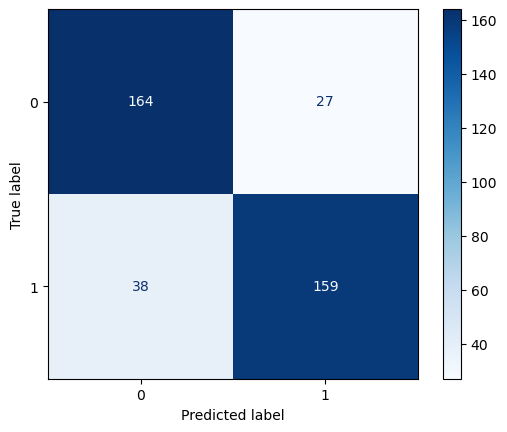

In [23]:
ConfusionMatrixDisplay(confusion_matrix(y_test, preds)).plot(cmap='Blues')

## Great job!